### Neste Exercicio vamos ver a performance de uma carteira de ativos.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


In [10]:
carteira = carteira.drop(carteira[carteira['Ativos'] == 'GNDI3'].index)

In [11]:
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,NTCO3,Ação,100
10,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [12]:
cotacoes_carteira = pd.DataFrame()


for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = yf.download('{}.SA'.format(ativo), start='2020-01-01', end='2023-05-31', progress=False)['Adj Close']

display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.439581,33.860634,10.9650,17.084026,17.714903,38.093487,108.023544,135.066345,181.281769,NaN
2020-01-03,113.800003,140.899994,11.922435,24.451944,33.504482,11.0675,17.537743,17.766314,40.747009,109.316162,133.253372,181.281769,NaN
2020-01-06,112.589996,139.100006,11.932189,24.015179,33.005886,11.3500,17.602497,17.740608,39.882378,108.460114,134.667496,179.810471,NaN
2020-01-07,112.239998,139.399994,11.898048,23.597984,32.240170,11.2650,17.567362,17.811388,40.528366,108.605644,130.379822,180.509766,NaN
2020-01-08,111.949997,138.199997,12.263843,23.232929,31.714859,11.2125,17.655199,17.653534,40.737072,106.636749,126.427544,170.292267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,105.269997,98.500000,3.630000,15.541290,26.402290,11.6100,10.720000,25.830000,13.340000,79.695000,97.337708,149.352463,105.269142
2023-05-25,106.550003,100.669998,3.760000,16.100616,27.231733,11.7600,10.720000,26.870001,13.500000,79.892998,97.992973,148.070526,105.239357
2023-05-26,107.510002,101.449997,3.820000,16.100616,27.021875,11.6900,11.110000,27.139999,13.760000,79.348503,97.873840,147.653137,105.487587


### Visualizando os dados 

In [13]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-01-02 to 2023-05-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  847 non-null    float64
 1   SMAL11  847 non-null    float64
 2   MGLU3   847 non-null    float64
 3   BBDC4   847 non-null    float64
 4   ITUB4   847 non-null    float64
 5   ENEV3   847 non-null    float64
 6   MOVI3   847 non-null    float64
 7   BPAC11  846 non-null    float64
 8   NTCO3   847 non-null    float64
 9   BCRI11  847 non-null    float64
 10  VILG11  847 non-null    float64
 11  KNRI11  847 non-null    float64
 12  XPLG11  742 non-null    float64
dtypes: float64(13)
memory usage: 92.6 KB


In [14]:
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.439581,33.860634,10.9650,17.084026,17.714903,38.093487,108.023544,135.066345,181.281769,NaN
2020-01-03,113.800003,140.899994,11.922435,24.451944,33.504482,11.0675,17.537743,17.766314,40.747009,109.316162,133.253372,181.281769,NaN
2020-01-06,112.589996,139.100006,11.932189,24.015179,33.005886,11.3500,17.602497,17.740608,39.882378,108.460114,134.667496,179.810471,NaN
2020-01-07,112.239998,139.399994,11.898048,23.597984,32.240170,11.2650,17.567362,17.811388,40.528366,108.605644,130.379822,180.509766,NaN
2020-01-08,111.949997,138.199997,12.263843,23.232929,31.714859,11.2125,17.655199,17.653534,40.737072,106.636749,126.427544,170.292267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,105.269997,98.500000,3.630000,15.541290,26.402290,11.6100,10.720000,25.830000,13.340000,79.695000,97.337708,149.352463,105.269142
2023-05-25,106.550003,100.669998,3.760000,16.100616,27.231733,11.7600,10.720000,26.870001,13.500000,79.892998,97.992973,148.070526,105.239357
2023-05-26,107.510002,101.449997,3.820000,16.100616,27.021875,11.6900,11.110000,27.139999,13.760000,79.348503,97.873840,147.653137,105.487587


### Ajustando os dados

In [15]:
df_media = cotacoes_carteira.mean()
cotacoes_carteira = cotacoes_carteira.fillna(df_media) # completando valores NaN com a media da carteira

# outra forma poderia ser utilizando o primeiro valor, e atribuindo a valores NaN
#cotacoes_carteira = cotacoes_carteira.ffill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 2020-01-02 to 2023-05-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  847 non-null    float64
 1   SMAL11  847 non-null    float64
 2   MGLU3   847 non-null    float64
 3   BBDC4   847 non-null    float64
 4   ITUB4   847 non-null    float64
 5   ENEV3   847 non-null    float64
 6   MOVI3   847 non-null    float64
 7   BPAC11  847 non-null    float64
 8   NTCO3   847 non-null    float64
 9   BCRI11  847 non-null    float64
 10  VILG11  847 non-null    float64
 11  KNRI11  847 non-null    float64
 12  XPLG11  847 non-null    float64
dtypes: float64(13)
memory usage: 92.6 KB


### Vamos ver como que as ações foram individualmente

* Primeiro iremos normalizar os dados

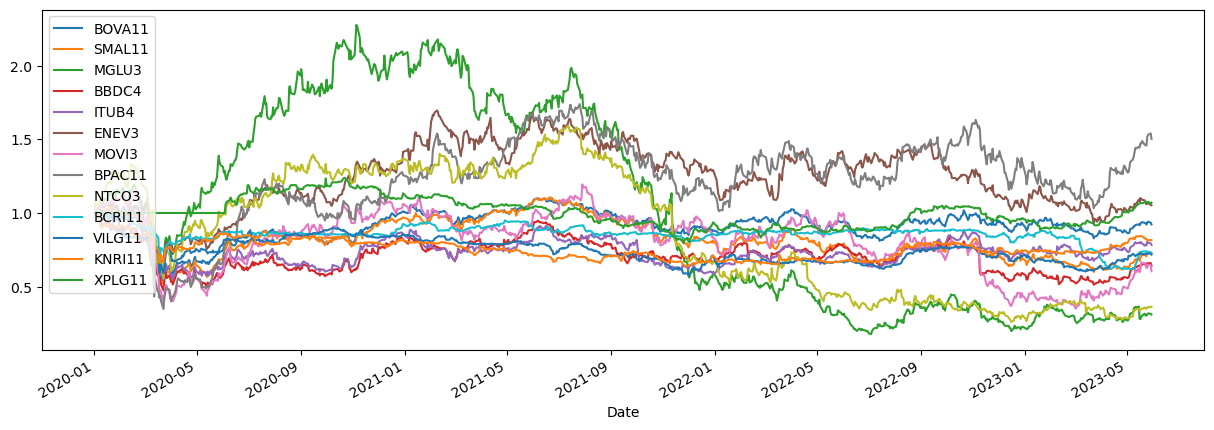

In [16]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize = (15, 5))
plt.legend(loc = 'upper left')

* Reestilizando gráfico

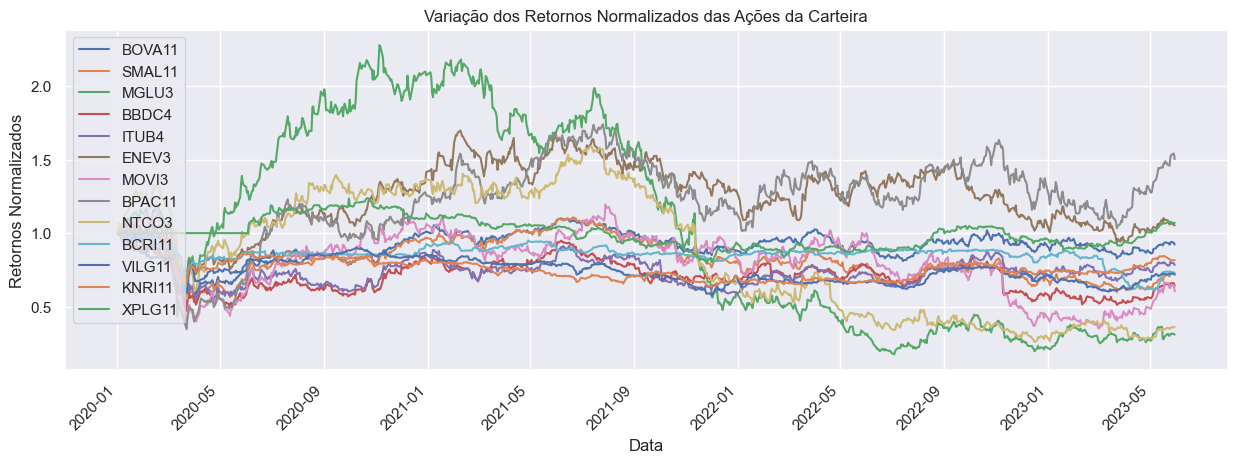

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do seaborn
sns.set(style="darkgrid")

# Calculando os retornos normalizados da carteira
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 5))

# Plotando o gráfico dos retornos normalizados
carteira_norm.plot(ax=ax)

# Configurando os rótulos e o título
ax.set_xlabel("Data")
ax.set_ylabel("Retornos Normalizados")
ax.set_title("Variação dos Retornos Normalizados das Ações da Carteira")

# Girando os rótulos do eixo x
plt.xticks(rotation=45)

# Configurando a legenda
plt.legend(loc='upper left')

# Exibindo o gráfico
plt.show()

### Vamos puxar o IBOV para comparar

In [18]:
import yfinance as yf
import pandas as pd

start_date = '2020-01-01'
end_date = '2023-05-31'

cotacao_ibov = yf.download('^BVSP', start=start_date, end=end_date)
cotacao_ibov = pd.DataFrame(cotacao_ibov)

display(cotacao_ibov)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2023-05-24,109920.0,109920.0,108546.0,108800.0,108800.0,12980200
2023-05-25,108800.0,111115.0,108800.0,110054.0,110054.0,14745300
2023-05-26,110058.0,111706.0,109900.0,110906.0,110906.0,11019700


### Criando um dataframe da Carteira com as quantidades de ações

In [19]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0]
    
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2443.958092,3386.063385,3289.500046,1708.402634,1771.490288,3809.348679,10802.354431,13506.634521,18128.176880,9801.792163
2020-01-03,11380.000305,14089.999390,11922.434807,2445.194435,3350.448227,3320.250034,1753.774261,1776.631355,4074.700928,10931.616211,13325.337219,18128.176880,9801.792163
2020-01-06,11258.999634,13910.000610,11932.188988,2401.517868,3300.588608,3405.000114,1760.249710,1774.060822,3988.237762,10846.011353,13466.749573,17981.047058,9801.792163
2020-01-07,11223.999786,13939.999390,11898.048401,2359.798431,3224.016953,3379.500103,1756.736183,1781.138802,4052.836609,10860.564423,13037.982178,18050.976562,9801.792163
2020-01-08,11194.999695,13819.999695,12263.842583,2323.292923,3171.485901,3363.749886,1765.519905,1765.353394,4073.707199,10663.674927,12642.754364,17029.226685,9801.792163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,10526.999664,9850.000000,3630.000114,1554.129028,2640.229034,3482.999897,1072.000027,2582.999992,1334.000015,7969.499969,9733.770752,14935.246277,10526.914215
2023-05-25,10655.000305,10066.999817,3759.999990,1610.061646,2723.173332,3528.000069,1072.000027,2687.000084,1350.000000,7989.299774,9799.297333,14807.052612,10523.935699
2023-05-26,10751.000214,10144.999695,3819.999933,1610.061646,2702.187538,3506.999874,1110.999966,2713.999939,1376.000023,7934.850311,9787.384033,14765.313721,10548.758698


### Comparação Carteira x IBOV

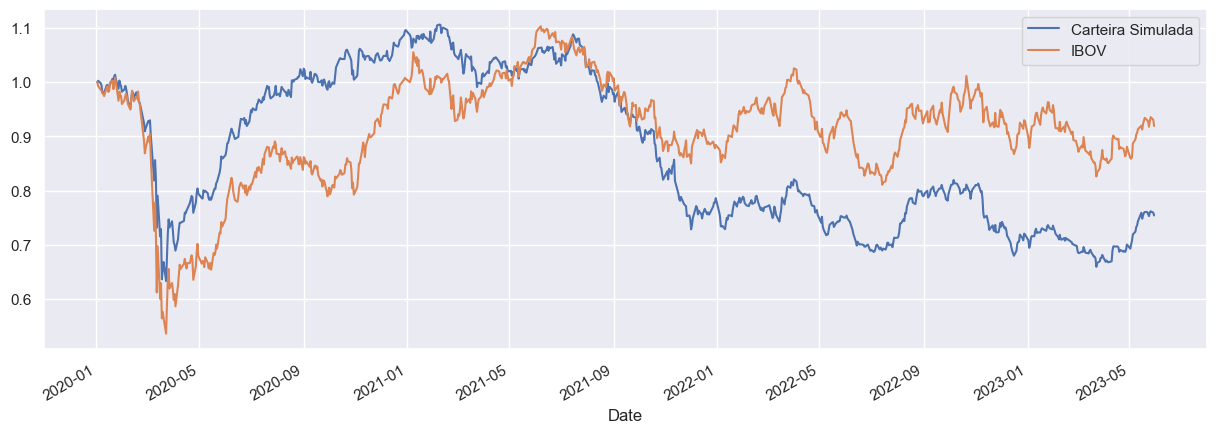

In [20]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize = (15,5), label = 'Carteira Simulada')
cotacao_ibov_norm['Adj Close'].plot(label = 'IBOV')
plt.legend()
plt.show()

### Reestilizando o grafico

Text(10, -30, 'Rentabilidade Acumulada: -24.61%')

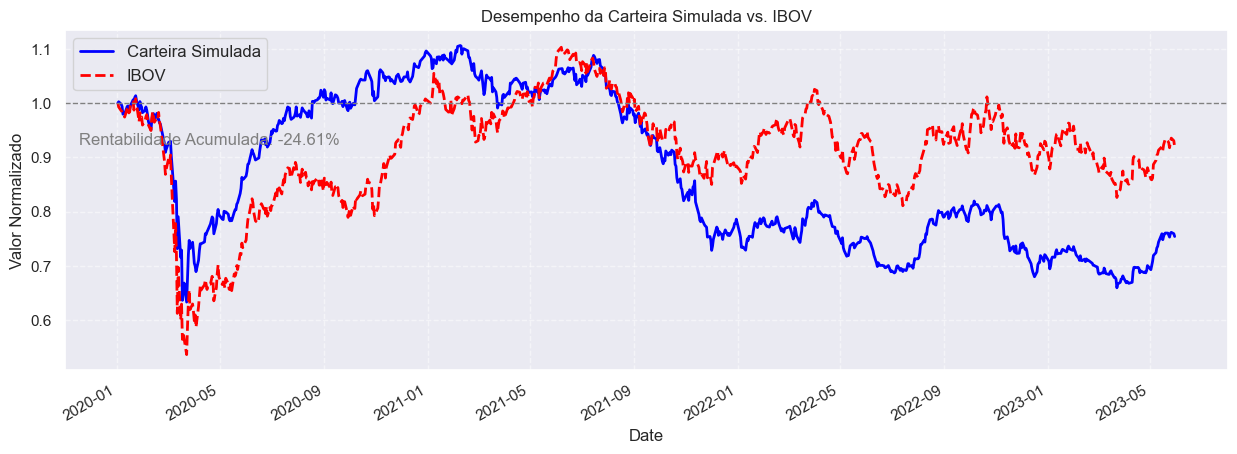

In [21]:
plt.title('Desempenho da Carteira Simulada vs. IBOV')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira Simulada', color='blue', linestyle='-', linewidth=2)
cotacao_ibov_norm['Adj Close'].plot(label='IBOV', color='red', linestyle='--', linewidth=2)

plt.legend(loc='upper left', fontsize='medium')

plt.grid(True, linestyle='--', alpha=0.5)

rentabilidade_acumulada = (valor_investido_norm['Total'].iloc[-1] - 1) * 100
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.annotate(f'Rentabilidade Acumulada: {rentabilidade_acumulada:.2f}%', xy=(0, 1), xytext=(10, -30),
             xycoords=('axes fraction', 'data'), textcoords='offset points', ha='left', color='gray')


### Retorno da Carteira e retorno do IBOV

In [22]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: -24.61%
Retorno IBOV: -8.10%


### Correlação da Carteira com o IBOV

In [23]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.4359795893486561


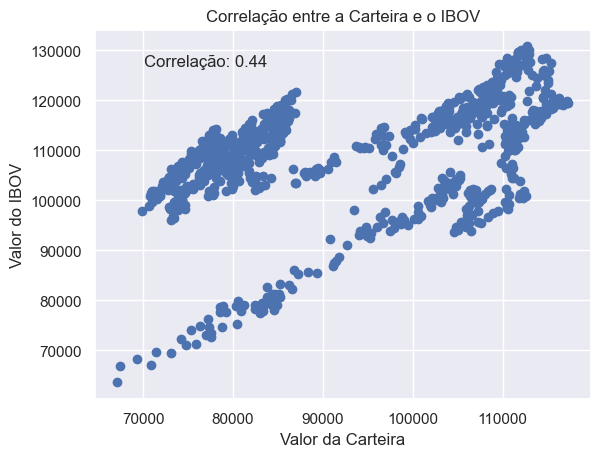

In [24]:
import matplotlib.pyplot as plt

# Calculando a correlação entre a carteira e o IBOV
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])

# Criando o gráfico de dispersão
plt.scatter(valor_investido['Total'], cotacao_ibov['Adj Close'])

# Configurando os rótulos e o título
plt.xlabel('Valor da Carteira')
plt.ylabel('Valor do IBOV')
plt.title('Correlação entre a Carteira e o IBOV')

# Adicionando o valor da correlação como texto no gráfico
plt.text(0.1, 0.9, f'Correlação: {correlacao:.2f}', transform=plt.gca().transAxes)

# Exibindo o gráfico
plt.show()

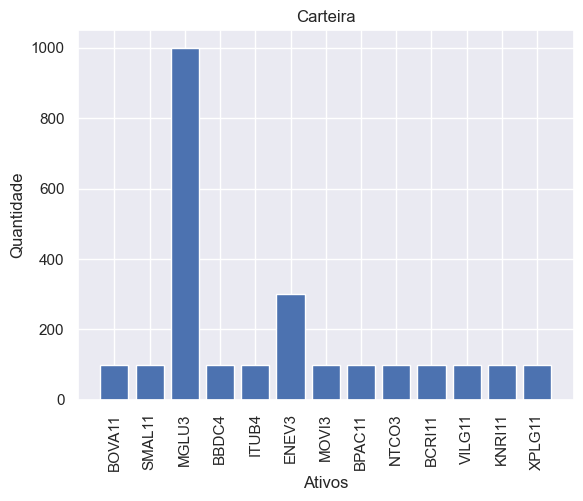

In [25]:
import matplotlib.pyplot as plt

ativos = ['BOVA11', 'SMAL11', 'MGLU3', 'BBDC4', 'ITUB4', 'ENEV3', 'MOVI3', 'BPAC11', 'NTCO3', 'BCRI11', 'VILG11', 'KNRI11', 'XPLG11']
qtde = [100, 100, 1000, 100, 100, 300, 100, 100, 100, 100, 100, 100, 100]

plt.bar(ativos, qtde)
plt.xlabel('Ativos')
plt.ylabel('Quantidade')
plt.title('Carteira')
plt.xticks(rotation=90)
plt.show()